<a href="https://colab.research.google.com/github/DhrumilBhatiya/CODSOFT/blob/main/Project3/Project3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SALES PREDICTION USING PYTHON**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read Dataset

In [ ]:
df = pd.read_csv('drive/MyDrive/CodSoft/Project3/advertising.csv')
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [ ]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


# Data Cleaning

In [ ]:
df.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [ ]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

# Data Visualization

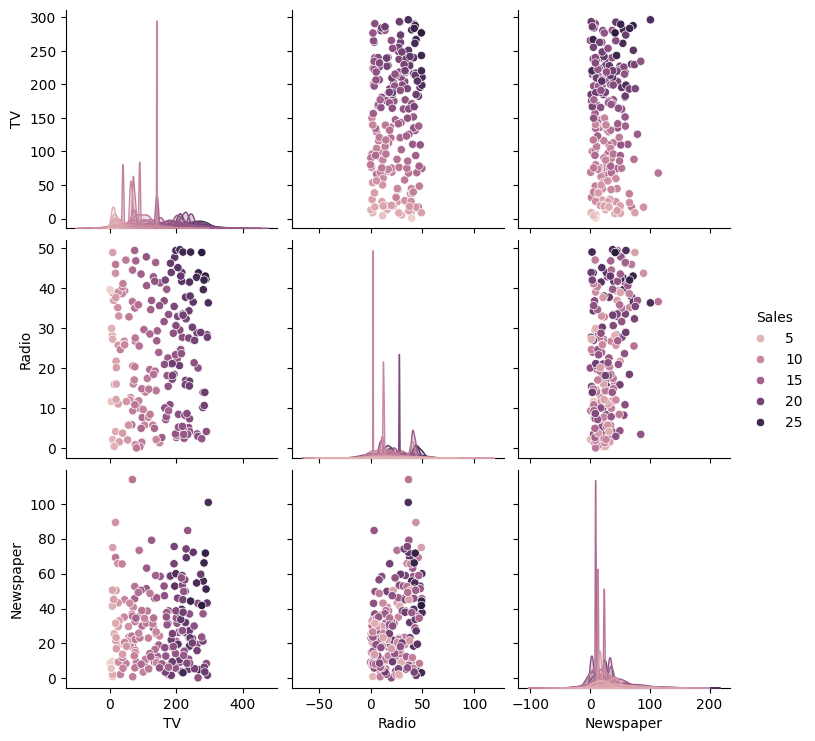

In [ ]:
sns.pairplot(df,hue='Sales')

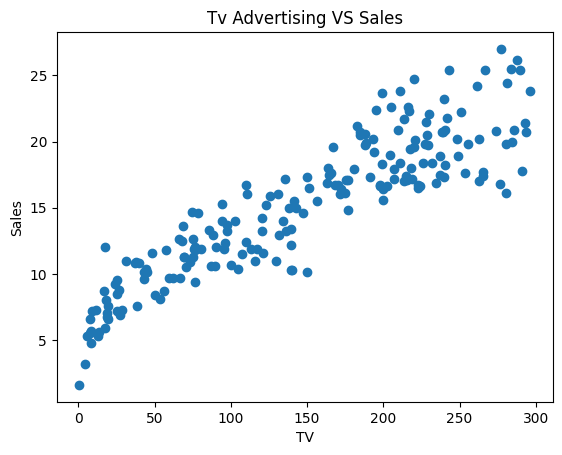

In [ ]:
# Scatter Plot for TV Sales
plt.scatter(df['TV'],df['Sales'])
plt.xlabel("TV")
plt.ylabel("Sales")
plt.title("Tv Advertising VS Sales")
plt.show()

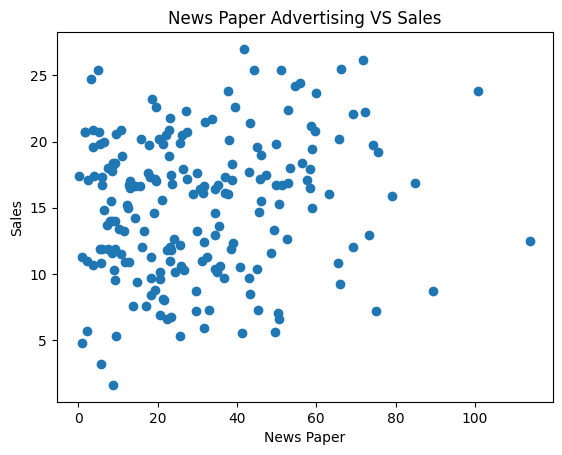

In [ ]:
# Scatter Plot for NewaPaper Sales
plt.scatter(df['Newspaper'],df['Sales'])
plt.xlabel('News Paper')
plt.ylabel('Sales')
plt.title('News Paper Advertising VS Sales')
plt.show()

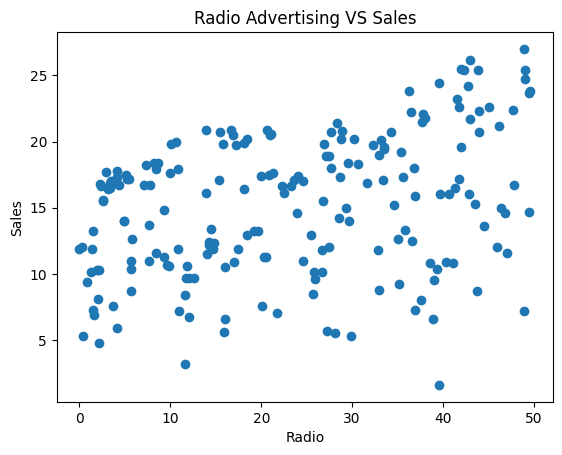

In [ ]:
# Scatter Plot for Radio Sales
plt.scatter(df['Radio'],df['Sales'])
plt.xlabel("Radio")
plt.ylabel('Sales')
plt.title('Radio Advertising VS Sales')
plt.show()

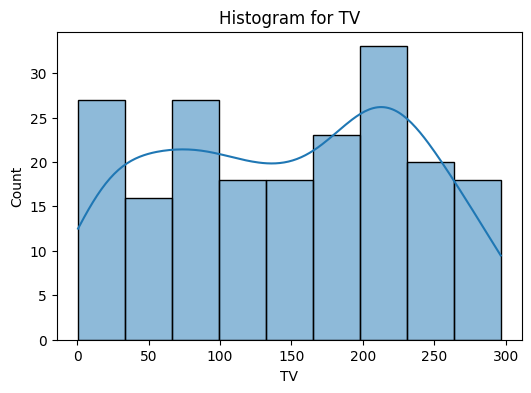

In [ ]:
# Histogram for TV
plt.figure(figsize=(6,4))
sns.histplot(df,x=df['TV'],kde=True)
plt.title("Histogram for TV")
plt.show()

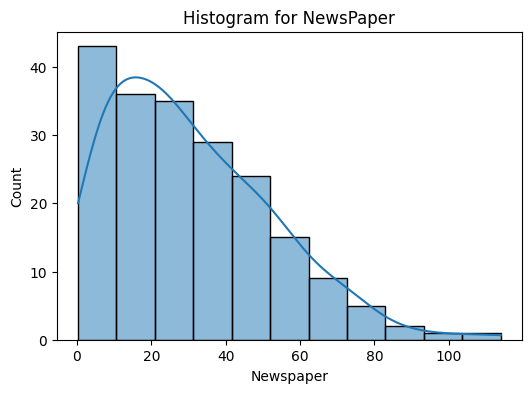

In [ ]:
# Histogram for NewsPaper
plt.figure(figsize=(6,4))
sns.histplot(df,x=df['Newspaper'],kde=True)
plt.title("Histogram for NewsPaper")
plt.show()

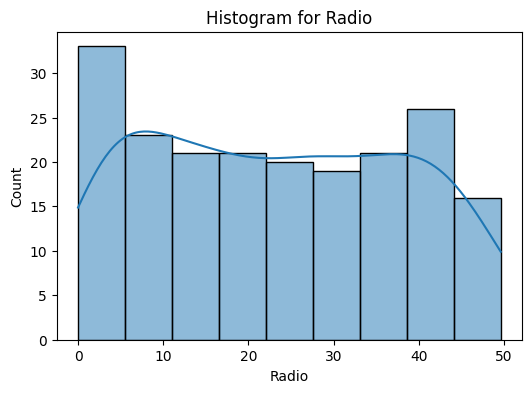

In [ ]:
# Histogram for Radio
plt.figure(figsize=(6,4))
sns.histplot(df,x=df['Radio'],kde=True)
plt.title("Histogram for Radio")
plt.show()

# Data Preprocessing

In [ ]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


<Axes: >

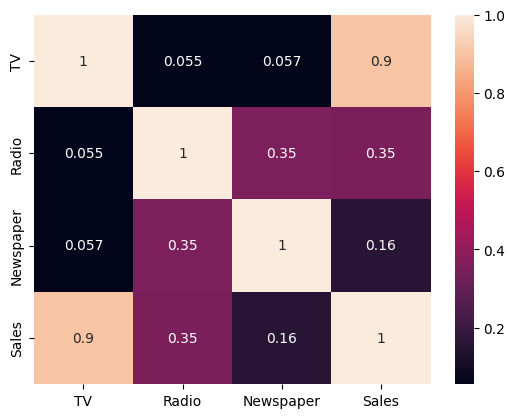

In [ ]:
sns.heatmap(df.corr(),annot=True)

In [ ]:
x = df['TV'].values.reshape(-1,1)
y = df['Sales'].values

# Split the Data

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25)

# Implement Model

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(x_train,y_train)

RandomForestRegressor(random_state=42)

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
x2 = df['Newspaper'].values.reshape(-1,1)
y2 = df['Sales'].values

In [ ]:
x2_train, x2_test, y2_train, y2_test = train_test_split(x2,y2,test_size=0.25)

In [ ]:
model2 = RandomForestRegressor(n_estimators=100,random_state=42)
model2.fit(x2_train,y2_train)

RandomForestRegressor(random_state=42)

In [ ]:
y2_pred = model2.predict(x2_test)

In [ ]:
x3 = df['Radio'].values.reshape(-1,1)
y3 = df['Sales'].values

In [ ]:
x3_train, x3_test, y3_train, y3_test = train_test_split(x3,y3,test_size=0.25)

In [ ]:
model3 = RandomForestRegressor(n_estimators=100,random_state=42)
model3.fit(x3_train,y3_train)

RandomForestRegressor(random_state=42)

In [ ]:
y3_pred = model3.predict(x3_test)

In [ ]:
# Find Out Mean Squared Error
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test,y_pred)
mse2 = mean_squared_error(y2_test,y2_pred)
mse3 = mean_squared_error(y3_test,y3_pred)

print(f"Mean Square Error for TV Advertising: {mse}")
print(f"Mean Square Error for News Paper Advertising: {mse2}")
print(f"Mean Square Error for Radio Advertising: {mse3}")

Mean Square Error for TV Advertising: 7.776490420133348
Mean Square Error for News Paper Advertising: 45.19455453103307
Mean Square Error for Radio Advertising: 43.04880797430822


In [ ]:
# Find Out R Squared Score
from sklearn.metrics import r2_score

r2 = r2_score(y_test,y_pred)
r2_2 = r2_score(y2_test,y2_pred)
r2_3 = r2_score(y3_test,y3_pred)

print(f"R-Squared Score for TV Advertising: {round(r2*100,2)}")
print(f"R-Squared Score for News Paper Advertising: {round(r2_2*100,2)}")
print(f"R-Squared Score for Radio Advertising: {round(r2_3*100,2)}")

R-Squared Score for TV Advertising: 65.6
R-Squared Score for News Paper Advertising: -55.83
R-Squared Score for Radio Advertising: -33.94
